In [4]:
import os
import zipfile
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import utils

In [2]:
!pip install kaggle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"supunlakshan22","key":"97e831caf7876e57106d37e8e73143b1"}'}

In [5]:
!pwd

/content


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
%cd /content/drive/MyDrive/CNN/Facemask Classification

/content/drive/MyDrive/CNN/Facemask Classification


In [11]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:06<00:00, 33.2MB/s]
100% 163M/163M [00:06<00:00, 25.0MB/s]


In [12]:
# Create a directory for the dataset
os.makedirs('face-mask-dataset', exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile('face-mask-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('face-mask-dataset')

# # Remove the zip file
# os.remove('face-mask-dataset.zip')

In [6]:
data_path =r'/content/drive/MyDrive/CNN/Facemask Classification/face-mask-dataset/data'
categories = os.listdir(data_path)
labels=np.arange(len(categories))
lable_dict=dict(zip(categories,labels))

In [7]:
print(lable_dict)
print(labels)
print(categories)

{'with_mask': 0, 'without_mask': 1}
[0 1]
['with_mask', 'without_mask']


In [8]:
images=[]
data=[]
target=[]
img_size=224

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        color_image=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize=cv2.resize(color_image,(img_size,img_size))
        data.append(resize)
        target.append(lable_dict[category])

In [11]:
!pwd

/content/drive/MyDrive/CNN/Facemask Classification


In [12]:
import numpy as np

data = np.array(data)
target = np.array(target)

In [13]:
print(data.shape,target.shape)

(7553, 224, 224, 3) (7553,)


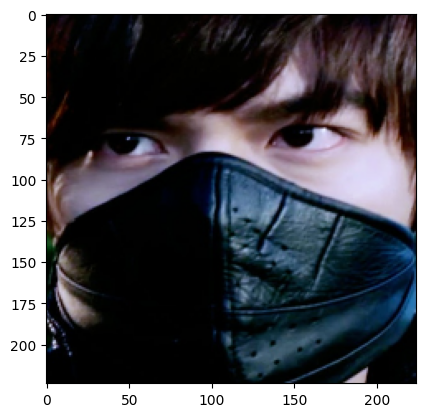

In [16]:
from matplotlib import pyplot as plt
plt.imshow(data[100])

In [18]:
#data_new=data.reshape(data.shape[0],data.shape[1],data.shape[1],1)

In [19]:
#data_new=data/255.0
from keras.utils import to_categorical
target_new = to_categorical(target, 3)

In [20]:
np.save('data_face',data)
np.save('target_face',target_new)

In [27]:
%pwd

'/content/drive/MyDrive/CNN/Facemask Classification'